In [6]:
# import necessary library
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np


##  1) Data Exploration

In [7]:
data = pd.read_csv('D:\\BCS\\Linear Programming\\assignment\\asignment002\\student_scores_dataset.csv')

In [8]:
data

,Study Hours,Exam Scores
0,3.7,87.9
1,9.5,143.6
2,7.3,123.7
3,6.0,99.9
4,1.6,64.5
...,...,...
95,4.9,95.3
96,5.2,101.9
97,4.3,94.5
98,0.3,53.9


In [9]:
# study hours >>>> independent
# Exam Scores >>>>  dependent

In [10]:
x = np.array(data['Study Hours']).reshape(-1,1)
y = np.array(data['Exam Scores'])

In [11]:
#  checking for null values in y
pd.isnull(y).sum()

0

In [12]:
#  checking for null values in x
pd.isnull(x).sum()

0

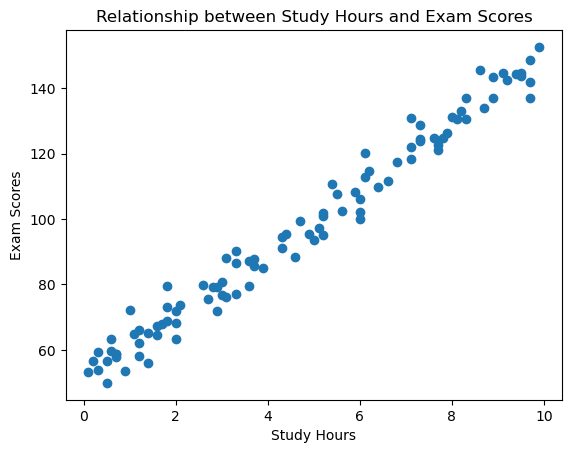

In [13]:
plt.xlabel("Study Hours")
plt.ylabel("Exam Scores")
plt.title("Relationship between Study Hours and Exam Scores")
plt.scatter(x,y)

 ## 2) Data Preprocessing 

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [15]:
#  x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.2,test_size=0.8)
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2)

 # # Standardize the independent variables<br><br>
 Standardization is used to rescale the features to have a mean of 0 and a standard deviation of 1  <br>
 This process ensures that all features contribute equally to the model fitting, preventing some features from dominating others due to their scale. <br>
Standardization is typically applied to the independent variables (features),<br><br>
 

In [16]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler:
scaler = StandardScaler()


# Fit the scaler to the training data and transform it:
x_train_scaled = scaler.fit_transform(x_train)


# Transform the testing data using the same scaler:
# The reason we don't use fit() on the testing data (X_test) 
# is because we want to apply the same transformation that was learned from the training data (X_train).
x_test_scaled = scaler.transform(x_test)



## 3) Linear regression Model 

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# trainig model on scaled training data

model = LinearRegression()
model.fit(x_train_scaled, y_train)


LinearRegression()

In [41]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = model.predict(x_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Absolute Error: 4.106803834144092
Mean Squared Error: 24.864997972220653
R-squared: 0.9744505974057869


In [43]:
model.intercept_

96.72749999999999

In [44]:
model.coef_

array([28.41039775])

In [46]:
# Perform necessary feature engineering

# Retrain the model
model.fit(x_train_scaled, y_train)


LinearRegression()

In [48]:
# Evaluate the performance
y_pred_updated = model.predict(x_test_scaled)

mae_updated = mean_absolute_error(y_test, y_pred_updated)
mse_updated = mean_squared_error(y_test, y_pred_updated)
r2_updated = r2_score(y_test, y_pred_updated)

print("Updated Model Performance:")
print("Mean Absolute Error:", mae_updated)
print("Mean Squared Error:", mse_updated)
print("R-squared:", r2_updated)

# Compare with initial model
print("Improvement in MAE:", mae - mae_updated)
print("Improvement in MSE:", mse - mse_updated)
print("Improvement in R-squared:", r2 - r2_updated)


Updated Model Performance:
Mean Absolute Error: 4.106803834144092
Mean Squared Error: 24.864997972220653
R-squared: 0.9744505974057869
Improvement in MAE: 0.0
Improvement in MSE: 0.0
Improvement in R-squared: 0.0
